Используем набор данных Ames Housing, который рассматривался на первых лекциях. </br> 

Сравниваем цены домов (SalePrice) в двух группах. </br>
Группы определяются по значениям количественных переменных, то есть по переменным из списка, определенного командой </br>
<code>AH.describe(include=[np.number])</code> </br>

Для примера используем переменную площадь дома <code>(Gr Liv Area)</code>. </br>
Группы определяются условием:
- значение переменной Gr Liv Area больше медианы или 
- значение переменной Gr Liv Area меньше медианы. 

Выбрать гипотезу для проверки. 
Либо гипотезу о равенстве математических ожиданий или гипотезу о равенстве медиан. 

Обосновать выбор. </br>
Проверить гипотезу. </br>
Проиллюстрировать результат ящиком с усами.

Самостоятельно выбрать две переменные, то есть сравнение производим ДВАЖДЫ, для двух разных переменных.</br>
В качестве группирующей переменной нельзя использовать переменные <code>SalePrice</code> и <code>Gr Liv Area</code>.


**Определим уровень значимости во всех тестах = 0.05**

In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
from scipy import stats

In [46]:
df = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)

In [47]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Зарарнее проанализировав гистограмму по 'SalePrice', сделала вывод, что будет логичным удалить наблюдения с ценой выше 700000:

In [48]:
df_cleaned = df[df['SalePrice'] <= 700000]
df_cleaned.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [49]:
pd.set_option('display.max_columns', None)
df_cleaned.describe(include=[np.number])

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2928.000000,2.928000e+03,2928.000000,2438.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.00000,2905.000000,2927.000000,2927.000000,2927.000000,2927.000000,2928.000000,2928.000000,2928.000000,2928.000000,2926.000000,2926.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2769.00000,2927.000000,2927.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,1465.295765,7.145916e+08,57.385587,69.173093,10142.162910,6.092213,5.563183,1971.340164,1984.25888,101.564200,441.718825,49.756406,559.204305,1050.679535,1158.691598,334.340505,4.679986,1497.712090,0.431306,0.060834,1.565574,0.379098,2.853484,1.044399,6.440574,0.598361,1978.12026,1.765972,472.580799,93.627049,47.522199,23.027322,2.594262,16.012978,2.055328,50.669740,6.217555,2007.790984,180407.259563
std,846.215317,1.887326e+08,42.652534,23.291774,7879.247072,1.407810,1.111838,30.249363,20.86534,178.064267,454.334161,169.221285,439.546410,439.309891,390.619960,426.401749,46.326168,499.973673,0.524834,0.244720,0.551858,0.502539,0.827472,0.214146,1.570750,0.647107,25.53359,0.760142,214.925405,126.284259,67.504086,64.158147,25.149828,56.104969,34.111601,566.536198,2.713668,1.316900,78515.562961
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.00000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.750000,5.284770e+08,20.000000,58.000000,7439.500000,5.000000,5.000000,1954.000000,1965.00000,0.000000,0.000000,0.000000,219.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.00000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1464.500000,5.354540e+08,50.000000,68.000000,9432.000000,6.000000,5.000000,1973.000000,1993.00000,0.000000,370.000000,0.000000,466.000000,990.000000,1083.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.00000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.250000,9.071811e+08,70.000000,80.000000,11532.750000,7.000000,6.000000,2001.000000,2004.00000,164.000000,734.000000,0.000000,801.500000,1300.000000,1383.250000,703.000000,0.000000,1742.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.00000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213492.500000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.00000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.00000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,625000.000000


Для нормального процесса построения гипотез, необходимо изучить данные, описание каждого столбца, построить графики зависимости и уже после делать какие-то выводы.

Garage Area (Continuous): Size of garage in square feet - Размер гаража в квадратных футах</br>
Overall Qual (Ordinal): Rates the overall material and finish of the house - Оценивает общий материал и отделку дома:</br>
       10	Very Excellent</br>
       9	Excellent</br>
       8	Very Good</br>
       7	Good</br>
       6	Above Average</br>
       5	Average</br>
       4	Below Average</br>
       3	Fair</br>
       2	Poor</br>
       1	Very Poor</br>
Total Bsmt SF (Continuous): Total square feet of basement area - Общая площадь подвала в квадратных метрах</br>

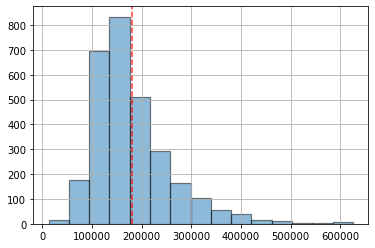

In [50]:
x = df_cleaned['SalePrice'].fillna(0)

x.hist(alpha=0.5, bins=15, edgecolor='black', linewidth=1.2, label='x')
plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.show()

Во-первых, кажется, данные выглядят корректно (цена больше 0, нет явных выбросов) и есть явный тренд в сторону смещенного нормального распределения с мат.ожиданием в ~180000 и std ~ 780000 (довольно большой разброс). </br>
Посмотрим на медианы выбранных переменных:

In [51]:
import numpy as np

median_value = np.median(df_cleaned[['Garage Area']].fillna(0))
median_value_1 = np.median(df_cleaned[['Overall Qual']])
median_value_2 = np.median(df_cleaned[['Mo Sold']].fillna(0))

print("Медиана 'Garage Area':", median_value)
print("Медиана 'Overall Qual':", median_value_1)
print("Медиана 'Total Bsmt SF':", median_value_2)

Медиана 'Garage Area': 480.0
Медиана 'Overall Qual': 6.0
Медиана 'Total Bsmt SF': 6.0


### 'Garage Area'

In [52]:
lower_half = df_cleaned[df_cleaned['Garage Area'] <= median_value]
upper_half = df_cleaned[df_cleaned['Garage Area'] > median_value]

In [53]:
pd.set_option('display.max_rows', None)
df_cleaned[['Garage Area', 'SalePrice']].sort_values(by='SalePrice', ascending=False)

,Garage Area,SalePrice
2445,807.0,625000
1063,789.0,615000
44,820.0,611657
432,762.0,610000
1637,1110.0,591587
2450,959.0,584500
433,1020.0,582933
2332,716.0,556581
423,672.0,555000
456,949.0,552000


In [54]:
lower_half[['Garage Area', 'SalePrice']]

,Garage Area,SalePrice
2,312.0,172000
5,470.0,195500
9,442.0,189000
10,440.0,175900
11,420.0,185000
12,393.0,180400
18,400.0,141000
23,480.0,149000
25,304.0,142000
27,0.0,115000


**Тест Колмогорова-Смирнова** используется для проверки того, происходит ли выборка из определенного распределения. Попытаемся определить, является ли данная выборка результатом нормального распределения:

In [55]:
from scipy.stats import kstest
result = kstest(df_cleaned[['SalePrice']], 'norm')
print('Для переменной SalePrice p-value: ', result[1])

Для переменной SalePrice p-value:  0.0


Из вывода мы видим, что p-значение равно 0. Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения. </br>
Далее посмотрим из скольких наблюдений состоят новые выборки:

In [56]:
lower_half['SalePrice'].describe().loc[['count', 'mean']]

count      1513.000000
mean     141829.473893
Name: SalePrice, dtype: float64

In [57]:
upper_half['SalePrice'].describe().loc[['count', 'mean']]

count      1414.000000
mean     221706.897454
Name: SalePrice, dtype: float64

Так как количество наблюдений в каждой из выборок < 2000, Тест Колмагорова-Смирнова использовать не целесообразно. Посмотрим на результаты теста Шапиро-Уилка: </br>
Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>

In [58]:
res = stats.shapiro(lower_half[['SalePrice']])
print('Для переменной x p-value: ', res[1])

Для переменной x p-value:  1.753844913888828e-17


Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения.

In [59]:
res = stats.shapiro(upper_half[['SalePrice']])
print('Для переменной x p-value: ', res[1])

Для переменной x p-value:  1.4391018471367857e-26


Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения.

In [60]:
def two_histograms(x, y):
    
    weights_x = [1. / len(x)] * len(x)
    weights_y = [1. / len(y)] * len(y)

    x.hist(alpha=0.5, weights=weights_x, bins=20, edgecolor='black', linewidth=1.2, label='x')
    y.hist(alpha=0.5, weights=weights_y, bins=15, edgecolor='black', linewidth=1.2, label='y')
    
    plt.show()

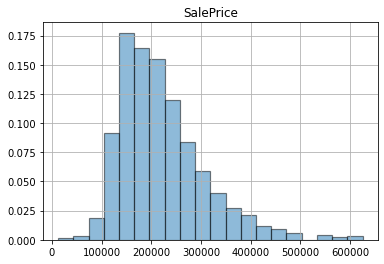

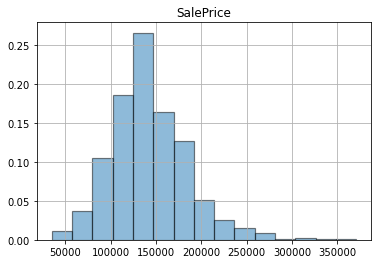

In [61]:
two_histograms(upper_half[['SalePrice']], lower_half[['SalePrice']])

In [62]:
df_cleaned['Log_Column1_Garage Area'] = np.log2(df_cleaned['SalePrice'])

In [63]:
median_value_3 = np.median(df_cleaned[['Log_Column1_Garage Area']].fillna(0))
median_value_3

17.28771237954945

In [64]:
lower_half_3 = df_cleaned[df_cleaned['Log_Column1_Garage Area'] <= median_value_3]
upper_half_3 = df_cleaned[df_cleaned['Log_Column1_Garage Area'] > median_value_3]

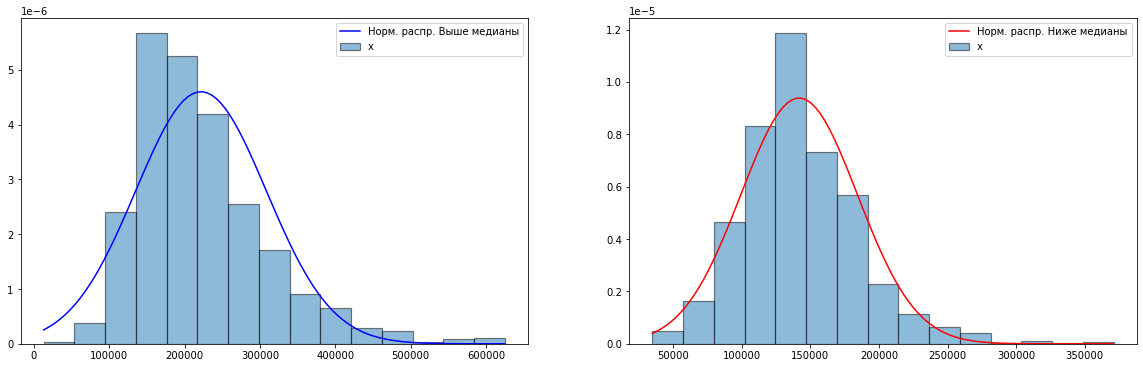

In [65]:
def plot_histogram_and_normal_curve(data, label, color):
    plt.hist(data, alpha=0.5, bins=15, edgecolor='black', linewidth=1.2, label='x', density=True)

    mu, sigma = np.mean(data), np.std(data)
    x_range = np.linspace(min(data), max(data), 100)
    
    # Строим кривую нормального распределения
    plt.plot(x_range, stats.norm.pdf(x_range, mu, sigma), label=f'Норм. распр. {label}', color=color)

    plt.legend()


plt.figure(figsize=(20, 6))

# Создаем второй график для upper_half
plt.subplot(1, 2, 1)
plot_histogram_and_normal_curve(upper_half['SalePrice'], 'Выше медианы', 'blue')

# Создаем первый график для lower_half
plt.subplot(1, 2, 2)
plot_histogram_and_normal_curve(lower_half['SalePrice'], 'Ниже медианы', 'red')

plt.show()

Логарифмирование должно было помочь избавиться от ассиметрии (в первом случае), но как мы можем заметить, читуация не улучшилась, поэтому откажемся от логарифмирования переменных.

Даже в случае, когда гипотеза о нормальности распределения переменной отвергнута, некоторые отклонения от нормальности не существенны. </br>
Существенные отклонения:
1. Наличие выбросов в данных. 
2. Явная асимметрия гистограммы. 
3. Очень сильное отклонение формы гистограммы от колоколообразной формы.

В данном случае обе гистограммы отображают информацию без выбросов, явная асимметрия в обоих слуаях отсутсвует, гистограмма имеет колокообразную форму, поэтому мы можем утверждать, что обе выборки имеют распределение несущественно отличающееся 
от нормального.

Использование тестов на сравнение медиан, таких как тест Манна-Уитни или тест Уилкоксона, в данном контексте связано с тем, что эти тесты предназначены для сравнения центральной тенденции, а не среднего значения. </br>
Причина заключается в том, что медиана является робастной мерой центральной тенденции, нечувствительной к выбросам или асимметрии данных. В случае асимметричных или смещенных распределений математическое ожидание (среднее значение) может быть сильно искажено выбросами или крайними значениями.</br>
Если распределение данных смещено или содержит выбросы, использование среднего значения (математического ожидания) для сравнения групп может привести к искаженным результатам. 

Mood's median test не рекомендуют. Большая ошибка 2 рода для малых выборок (по сравнению с другими тестами). Можно применять только для больших выборок 3000+ наблюдений. </br>
Проверка гипотезы о равенстве медиан.
Для несвязных выборок: **критерий Манна-Уитни**</br>

Я хочу узнать отличаются ли цены на дома, попавшие в разные выборки, которые были образованы при делении исходной выборки по переменной "Garage Area" по медиане. Тогда гипотезы будут выглядеть следующим образом:</br>

- H0 (нулевая гипотеза): Медианы цен на дома в группах с меньшей и большей площадью гаража равны.
- H1 (альтернативная гипотеза): Медианы цен на дома в группах с меньшей и большей площадью гаража различны.


In [66]:
result_1 = stats.mannwhitneyu(lower_half[['SalePrice']], upper_half[['SalePrice']])
print('p-value:', result_1[1])

p-value: [7.16546966e-190]


Поскольку нам не удалось отвергнуть альтернативную гипотезу, у нас нет достаточных доказательств того, что медианы цен на дома в группах с меньшей и большей площадью гаража равны.

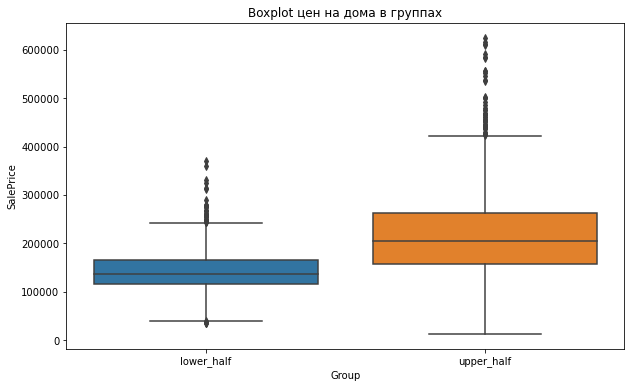

In [67]:
import seaborn as sns
def gerBoxplot(result_1):
    if result_1[1] < 0.05:

        data_to_plot = pd.DataFrame({
            'Group': np.concatenate([np.full(len(lower_half), 'lower_half'), np.full(len(upper_half), 'upper_half')]),
            'SalePrice': np.concatenate([lower_half['SalePrice'], upper_half['SalePrice']])
        })

        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Group', y='SalePrice', data=data_to_plot)
        plt.title('Boxplot цен на дома в группах')
        plt.show()
    else:
        print('Нет статистически значимых различий.')
        
gerBoxplot(result_1)

### 'Overall Qual'

In [68]:
lower_half_1 = df_cleaned[df_cleaned['Overall Qual'] <= median_value_1]
upper_half_1 = df_cleaned[df_cleaned['Overall Qual'] > median_value_1]

In [69]:
pd.set_option('display.max_rows', None)
df_cleaned[['Overall Qual', 'SalePrice']].sort_values(by='SalePrice', ascending=False)

,Overall Qual,SalePrice
2445,10,625000
1063,10,615000
44,9,611657
432,10,610000
1637,9,591587
2450,9,584500
433,9,582933
2332,9,556581
423,10,555000
456,10,552000


Далее посмотрим из скольких наблюдений состоят новые выборки:

In [70]:
lower_half_1['SalePrice'].describe().loc[['count', 'mean']]

count      1840.000000
mean     140281.749457
Name: SalePrice, dtype: float64

In [71]:
upper_half_1['SalePrice'].describe().loc[['count', 'mean']]

count      1088.000000
mean     248266.578125
Name: SalePrice, dtype: float64

Так как количество наблюдений в каждой из выборок < 2000, Тест Колмагорова-Смирнова использовать не целесообразно. Посмотрим на результаты теста Шапиро-Уилка: </br>
Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>

In [72]:
res = stats.shapiro(lower_half_1[['SalePrice']])
print('Для переменной x p-value: ', res[1])

Для переменной x p-value:  1.0583441756648518e-16


Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения.

In [73]:
res = stats.shapiro(upper_half_1[['SalePrice']])
print('Для переменной x p-value: ', res[1])

Для переменной x p-value:  3.8588496894327956e-25


Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения.

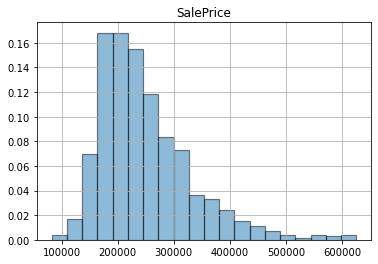

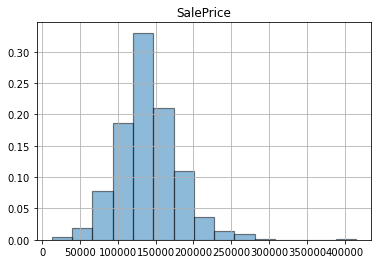

In [74]:
two_histograms(upper_half_1[['SalePrice']], lower_half_1[['SalePrice']])

Проверка гипотезы о равенстве медиан.
Для несвязных выборок: **критерий Манна-Уитни**</br>

Я хочу узнать отличаются ли цены на дома, попавшие в разные выборки, которые были образованы при делении исходной выборки по переменной 'Overall Qual' по медиане. Тогда гипотезы будут выглядеть следующим образом:</br>

- H0 (нулевая гипотеза): Медианы цен на дома в группах с низким и высоким общим качеством равны.
- H1 (альтернативная гипотеза): Медианы цен на дома в группах с низким и высоким общим качеством различны.

In [75]:
result = stats.mannwhitneyu(lower_half_1[['SalePrice']], upper_half_1[['SalePrice']])
print('p-value:', result[1])

p-value: [0.]


Поскольку p-значение меньше 0,05, мы не принимаем нулевую гипотезу. Так как нам не удалось отвергнуть альтернативную гипотезу, у нас нет достаточных доказательств того, что медианы цен на дома в группах с низким и высоким общим качеством равны.

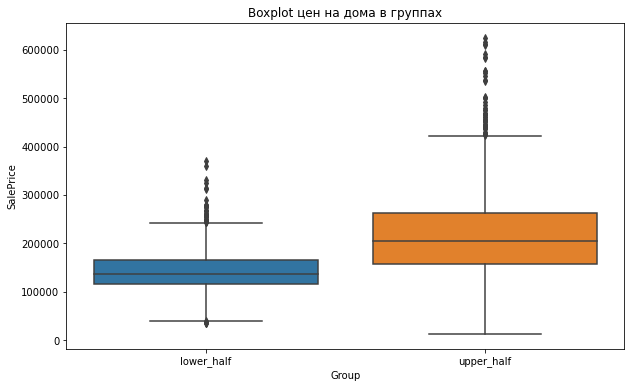

In [76]:
import seaborn as sns
def gerBoxplot(result_1):
    if result_1[1] < 0.05:

        data_to_plot = pd.DataFrame({
            'Group': np.concatenate([np.full(len(lower_half), 'lower_half'), np.full(len(upper_half), 'upper_half')]),
            'SalePrice': np.concatenate([lower_half['SalePrice'], upper_half['SalePrice']])
        })

        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Group', y='SalePrice', data=data_to_plot)
        plt.title('Boxplot цен на дома в группах')
        plt.show()
    else:
        print('Нет статистически значимых различий.')
        
gerBoxplot(result)

### 'Mo Sold***'

In [77]:
lower_half_2 = df_cleaned[df_cleaned['Mo Sold'] <= median_value_2]
upper_half_2 = df_cleaned[df_cleaned['Mo Sold'] > median_value_2]

In [78]:
pd.set_option('display.max_rows', None)
df_cleaned[['Mo Sold', 'SalePrice']].sort_values(by='SalePrice', ascending=True)

,Mo Sold,SalePrice
181,6,12789
1553,2,13100
726,11,34900
2843,2,35000
2880,10,35311
709,5,37900
1901,1,39300
1555,7,40000
727,9,44000
708,10,45000


In [79]:
res = stats.shapiro(lower_half_2[['SalePrice']])
print('Для переменной x p-value: ', res[1])

Для переменной x p-value:  1.457644678265811e-34


In [80]:
res = stats.shapiro(upper_half_2[['SalePrice']])
print('Для переменной x p-value: ', res[1])

Для переменной x p-value:  5.040051775349483e-28


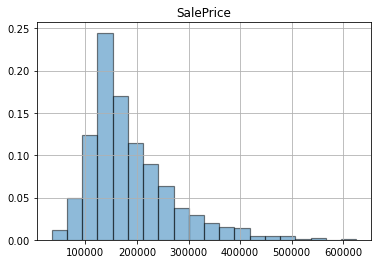

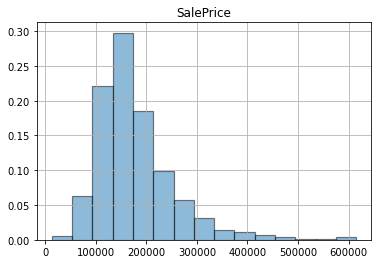

In [81]:
two_histograms(upper_half_2[['SalePrice']], lower_half_2[['SalePrice']])

Проверка гипотезы о равенстве медиан.
Для несвязных выборок: **критерий Манна-Уитни**</br>

Я хочу узнать отличаются ли цены на дома, попавшие в разные выборки, которые были образованы при делении исходной выборки по переменной "Mo Sold" по медиане. Тогда гипотезы будут выглядеть следующим образом:</br>

- H0 (нулевая гипотеза): Медианы цен на дома в группах с продажами в первом полугодии и во втором равны.
- H1 (альтернативная гипотеза): иначе.


In [82]:
result = stats.mannwhitneyu(lower_half_2[['SalePrice']], upper_half_2[['SalePrice']])
print('p-value:', result[1])

p-value: [0.01501024]


Поскольку p-значение меньше 0,05, мы не принимаем нулевую гипотезу. Так как нам не удалось отвергнуть альтернативную гипотезу, у нас нет достаточных доказательств того, что медианы цен на дома в группах с низким и высоким общим качеством равны.

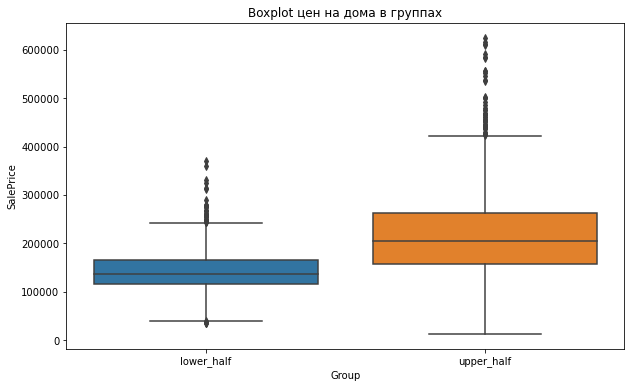

In [83]:
import seaborn as sns
def gerBoxplot(result_1):
    if result_1[1] < 0.05:

        data_to_plot = pd.DataFrame({
            'Group': np.concatenate([np.full(len(lower_half), 'lower_half'), np.full(len(upper_half), 'upper_half')]),
            'SalePrice': np.concatenate([lower_half['SalePrice'], upper_half['SalePrice']])
        })

        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Group', y='SalePrice', data=data_to_plot)
        plt.title('Boxplot цен на дома в группах')
        plt.show()
    else:
        print('Нет статистически значимых различий.')
        
gerBoxplot(result)

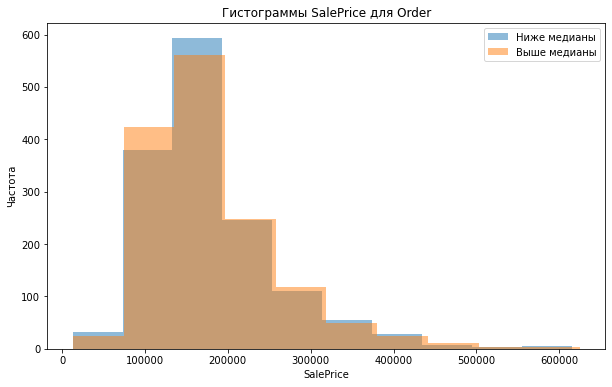

p-value для Order: 0.8251858376294654


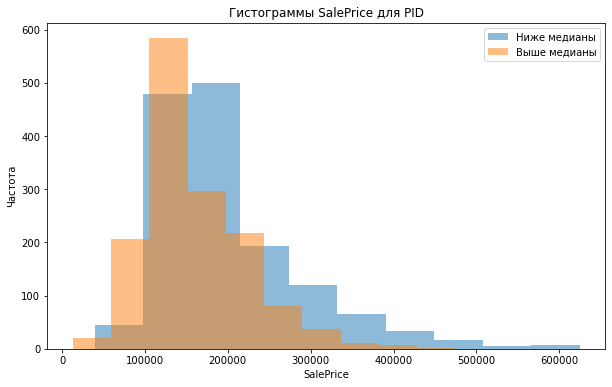

p-value для PID: 7.103218772729235e-46


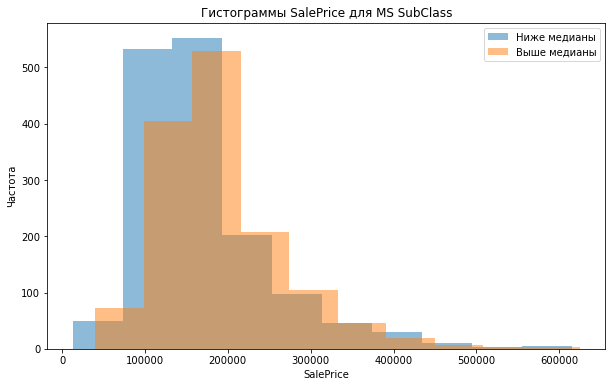

p-value для MS SubClass: 1.6824583292083085e-35
Столбец MS Zoning не является числовым и будет пропущен.


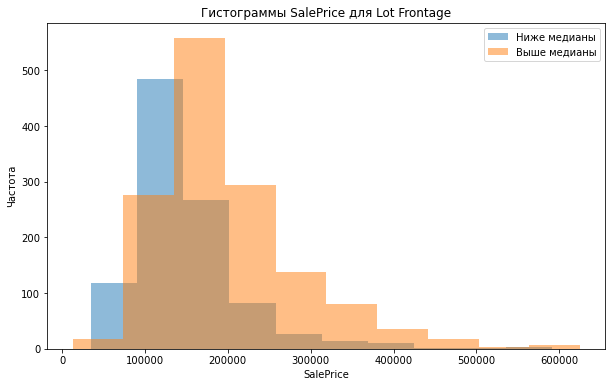

p-value для Lot Frontage: 1.9844488275917534e-68


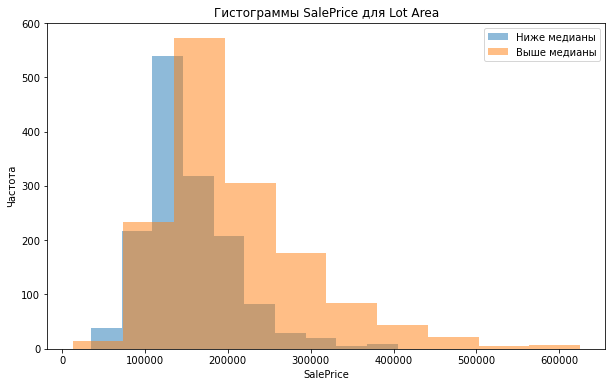

p-value для Lot Area: 8.900471007019188e-88
Столбец Street не является числовым и будет пропущен.
Столбец Alley не является числовым и будет пропущен.
Столбец Lot Shape не является числовым и будет пропущен.
Столбец Land Contour не является числовым и будет пропущен.
Столбец Utilities не является числовым и будет пропущен.
Столбец Lot Config не является числовым и будет пропущен.
Столбец Land Slope не является числовым и будет пропущен.
Столбец Neighborhood не является числовым и будет пропущен.
Столбец Condition 1 не является числовым и будет пропущен.
Столбец Condition 2 не является числовым и будет пропущен.
Столбец Bldg Type не является числовым и будет пропущен.
Столбец House Style не является числовым и будет пропущен.


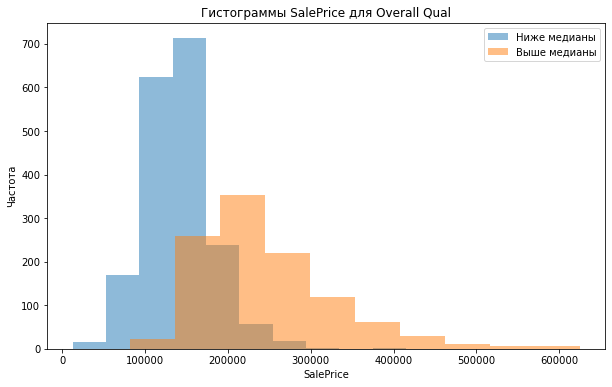

p-value для Overall Qual: 0.0


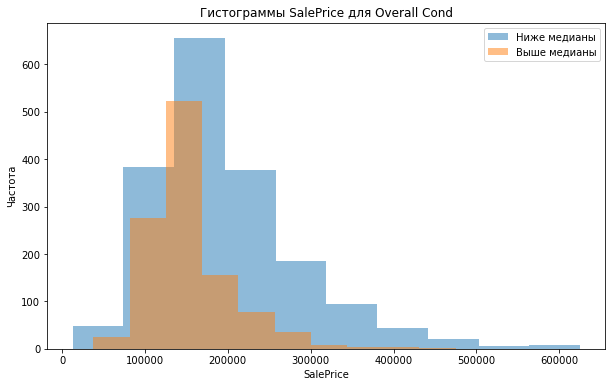

p-value для Overall Cond: 2.578120216306155e-52


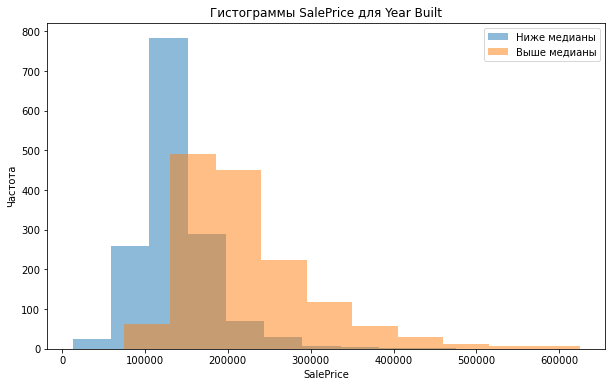

p-value для Year Built: 8.541168347389648e-271


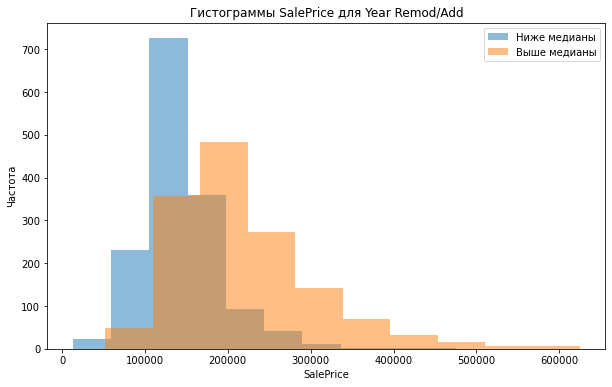

p-value для Year Remod/Add: 2.506191911241047e-180
Столбец Roof Style не является числовым и будет пропущен.
Столбец Roof Matl не является числовым и будет пропущен.
Столбец Exterior 1st не является числовым и будет пропущен.
Столбец Exterior 2nd не является числовым и будет пропущен.
Столбец Mas Vnr Type не является числовым и будет пропущен.


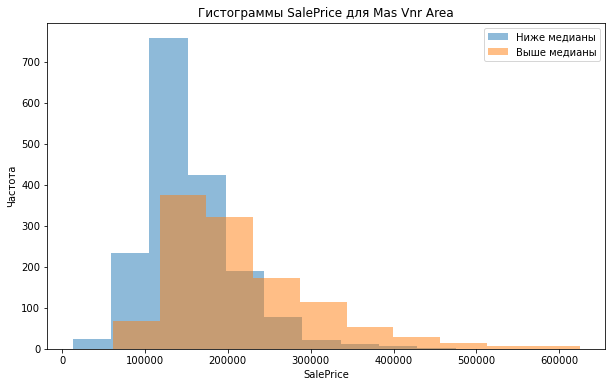

p-value для Mas Vnr Area: 9.771383498901934e-108
Столбец Exter Qual не является числовым и будет пропущен.
Столбец Exter Cond не является числовым и будет пропущен.
Столбец Foundation не является числовым и будет пропущен.
Столбец Bsmt Qual не является числовым и будет пропущен.
Столбец Bsmt Cond не является числовым и будет пропущен.
Столбец Bsmt Exposure не является числовым и будет пропущен.
Столбец BsmtFin Type 1 не является числовым и будет пропущен.


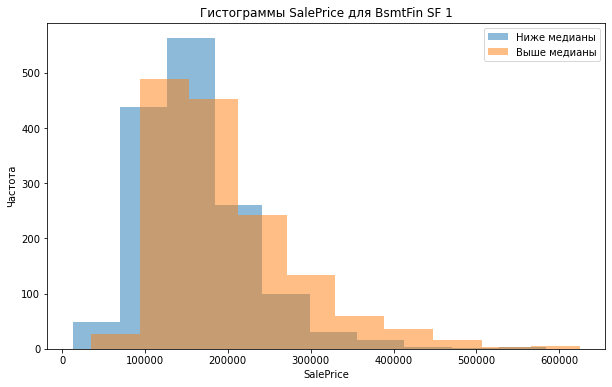

p-value для BsmtFin SF 1: 1.0769194058581999e-44
Столбец BsmtFin Type 2 не является числовым и будет пропущен.


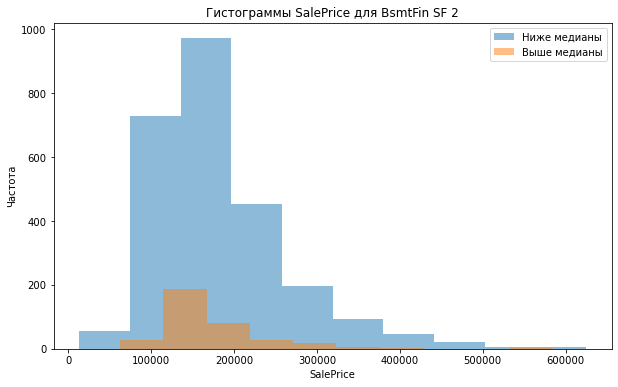

p-value для BsmtFin SF 2: 0.04463323887829401


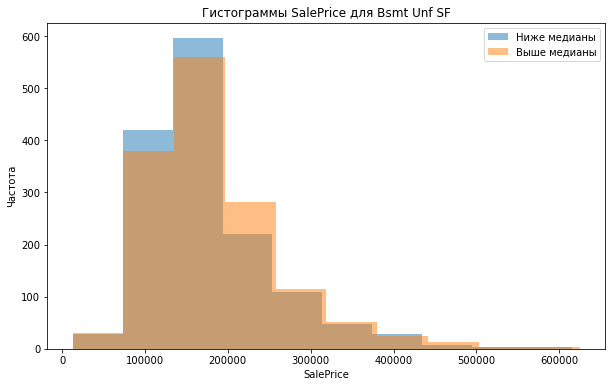

p-value для Bsmt Unf SF: 0.00023022644787460566


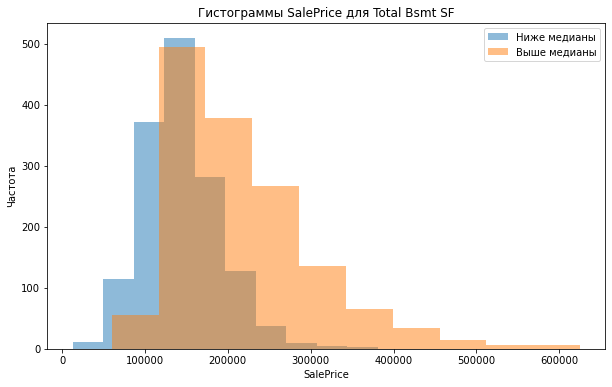

p-value для Total Bsmt SF: 2.9421314710814205e-155
Столбец Heating не является числовым и будет пропущен.
Столбец Heating QC не является числовым и будет пропущен.
Столбец Central Air не является числовым и будет пропущен.
Столбец Electrical не является числовым и будет пропущен.


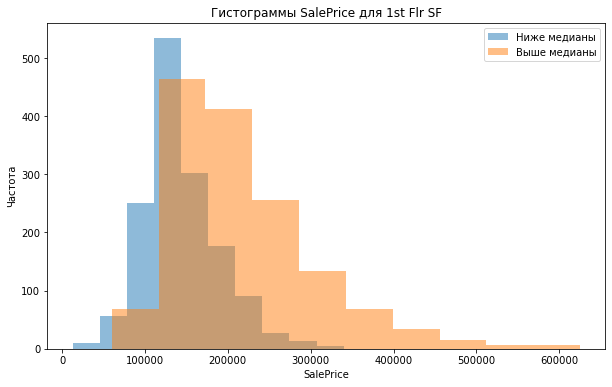

p-value для 1st Flr SF: 7.348840292737262e-164


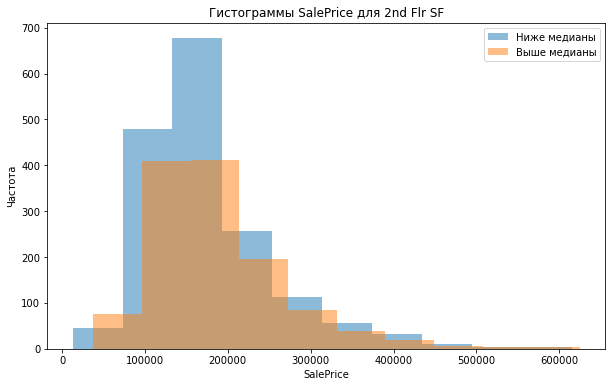

p-value для 2nd Flr SF: 3.965427905791551e-09


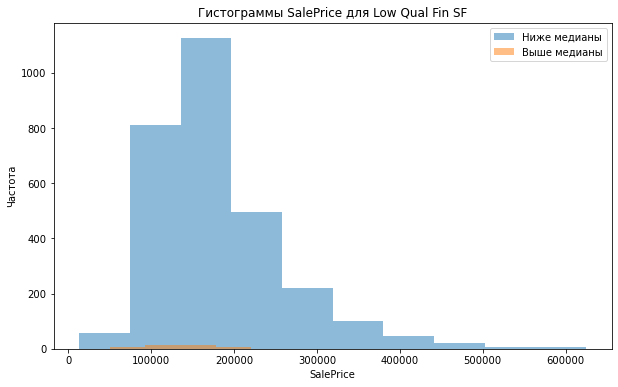

p-value для Low Qual Fin SF: 9.762377552570255e-05


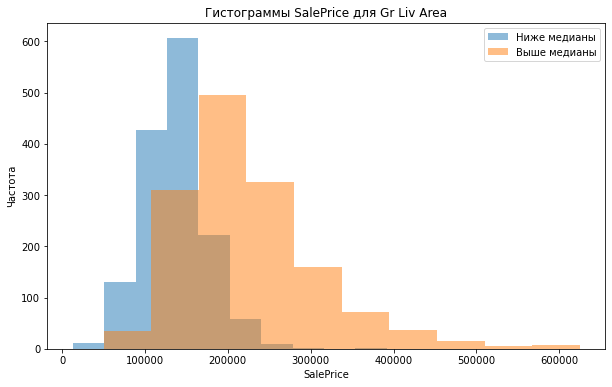

p-value для Gr Liv Area: 1.3550085173357873e-245


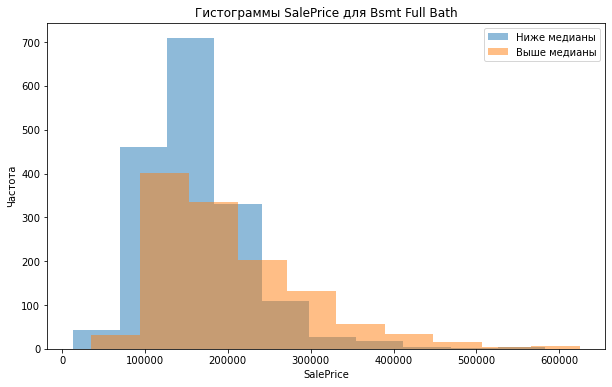

p-value для Bsmt Full Bath: 3.1560450808995525e-44


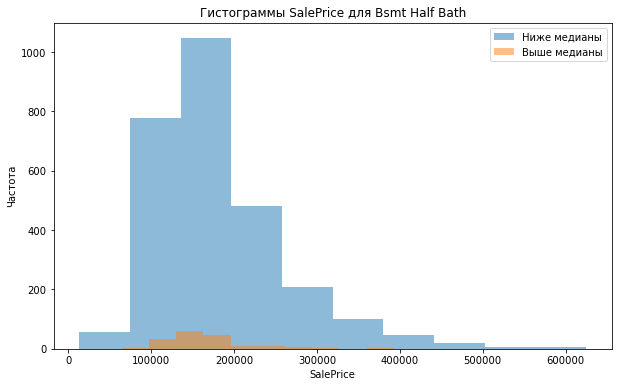

p-value для Bsmt Half Bath: 0.08433677075378758


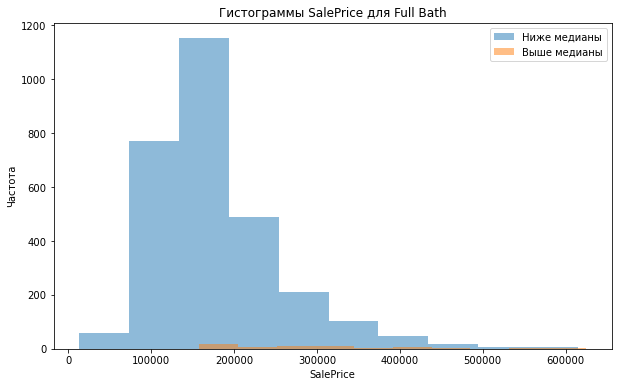

p-value для Full Bath: 8.219346204245375e-22


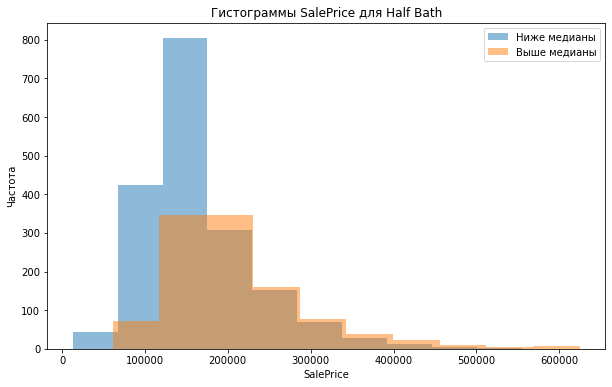

p-value для Half Bath: 1.2723748037436535e-73


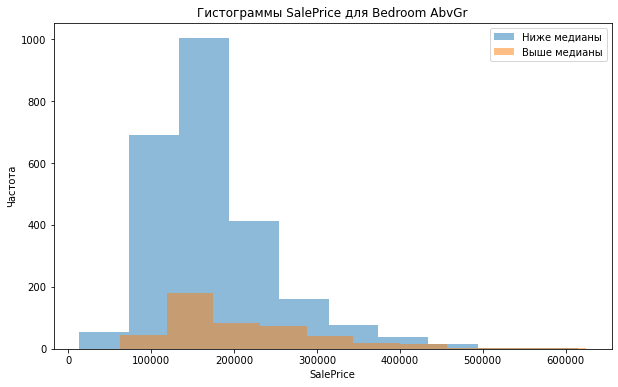

p-value для Bedroom AbvGr: 1.0100493707095713e-13


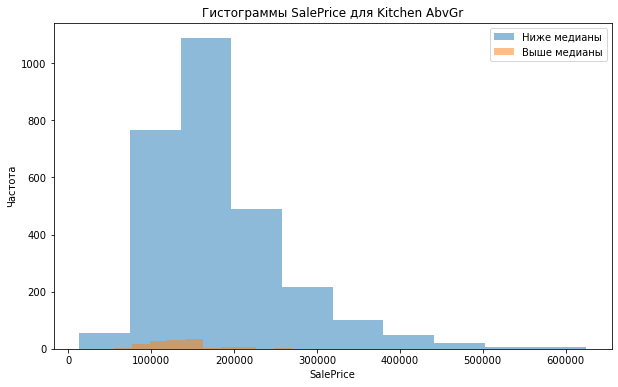

p-value для Kitchen AbvGr: 2.4425953316687693e-15
Столбец Kitchen Qual не является числовым и будет пропущен.


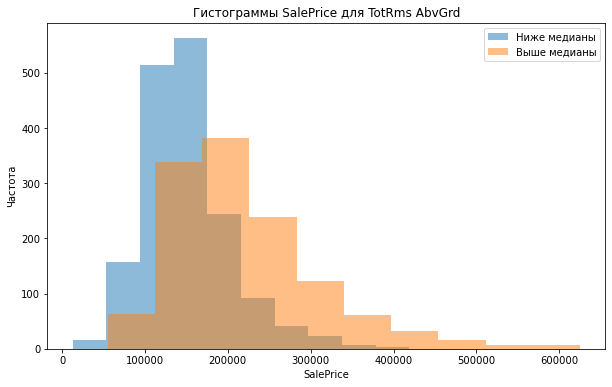

p-value для TotRms AbvGrd: 1.1213456670196601e-128
Столбец Functional не является числовым и будет пропущен.


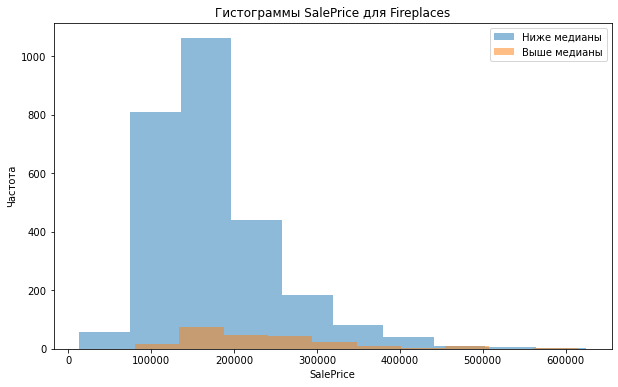

p-value для Fireplaces: 5.000159344377515e-27
Столбец Fireplace Qu не является числовым и будет пропущен.
Столбец Garage Type не является числовым и будет пропущен.


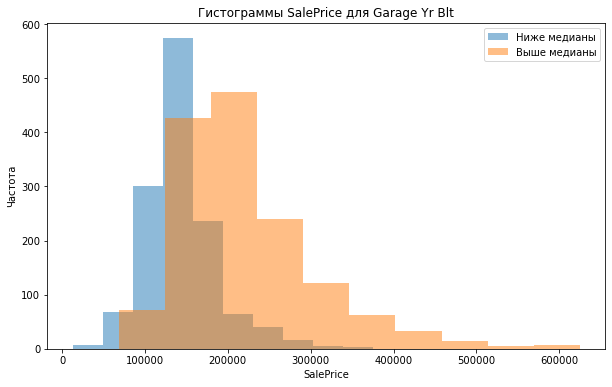

p-value для Garage Yr Blt: 2.3511829545788057e-200
Столбец Garage Finish не является числовым и будет пропущен.


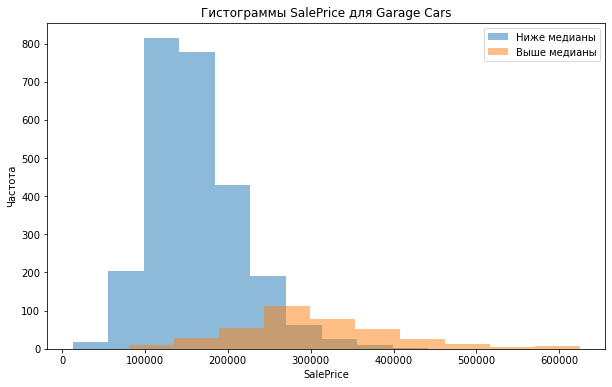

p-value для Garage Cars: 2.1467560524590455e-149


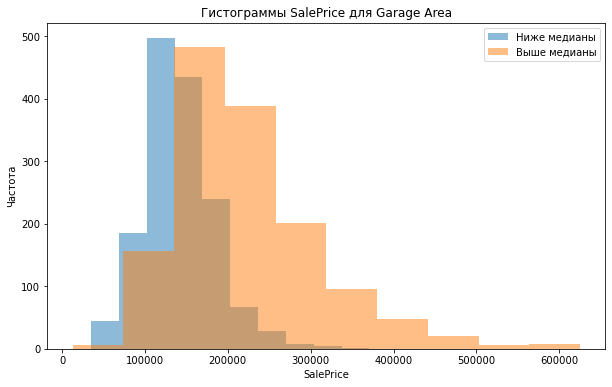

p-value для Garage Area: 7.165469660203979e-190
Столбец Garage Qual не является числовым и будет пропущен.
Столбец Garage Cond не является числовым и будет пропущен.
Столбец Paved Drive не является числовым и будет пропущен.


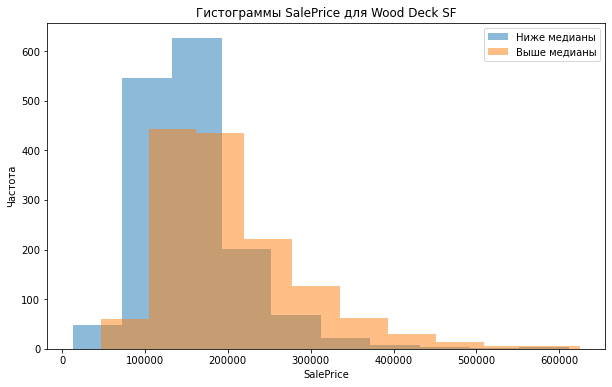

p-value для Wood Deck SF: 4.97982667814969e-75


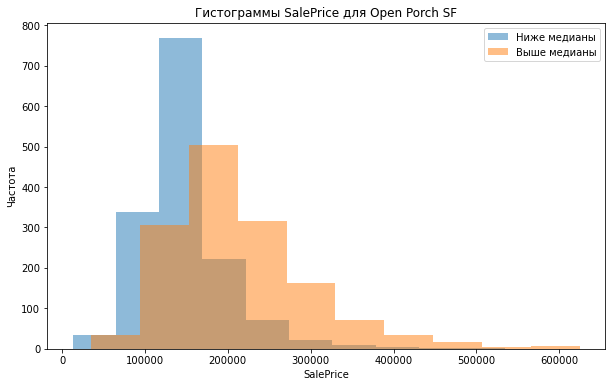

p-value для Open Porch SF: 5.663383317127021e-150


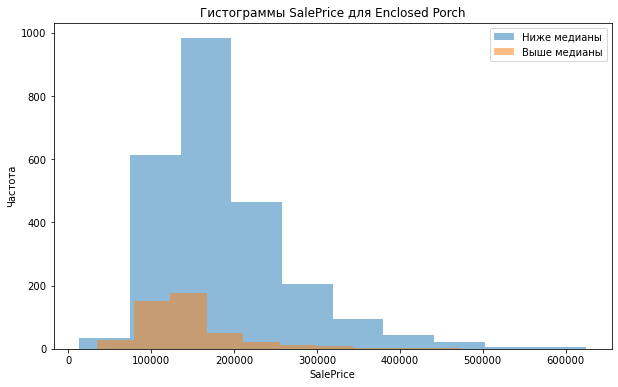

p-value для Enclosed Porch: 1.2494922464859234e-39


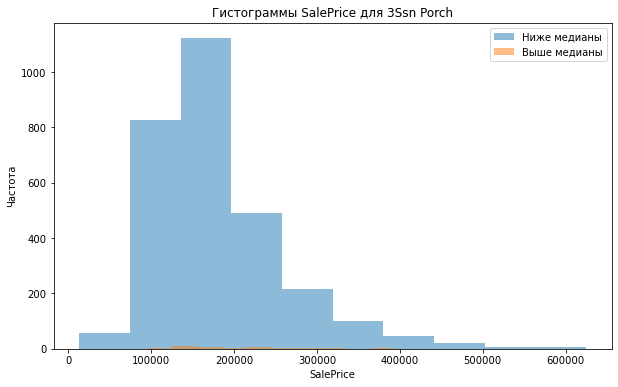

p-value для 3Ssn Porch: 0.017753819873371317


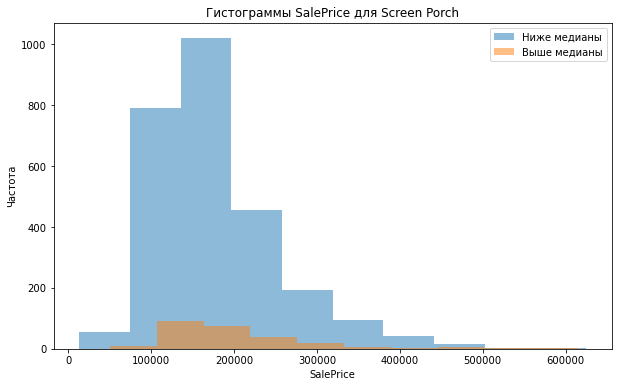

p-value для Screen Porch: 1.0228643864085968e-06


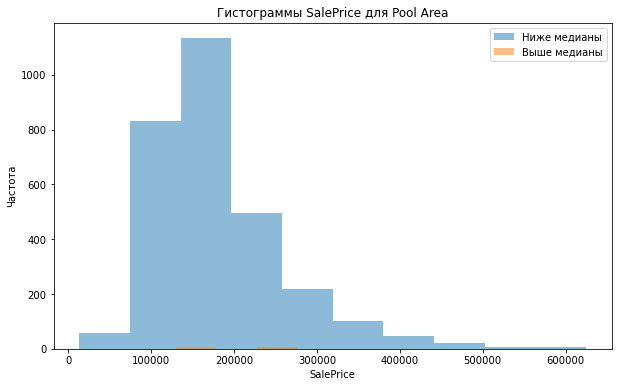

p-value для Pool Area: 0.01162897689350944
Столбец Pool QC не является числовым и будет пропущен.
Столбец Fence не является числовым и будет пропущен.
Столбец Misc Feature не является числовым и будет пропущен.


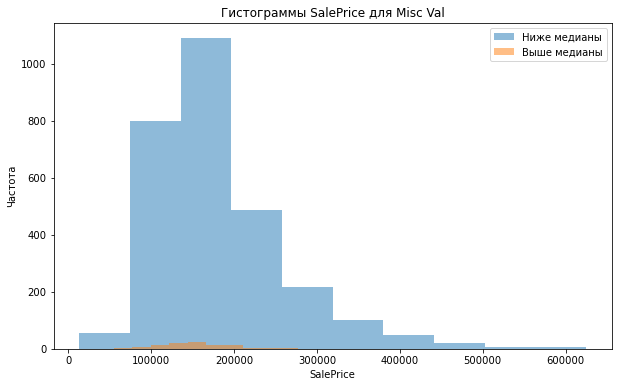

p-value для Misc Val: 0.006630883353175834


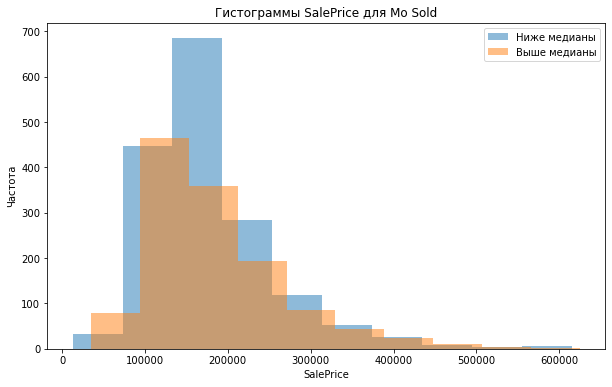

p-value для Mo Sold: 0.015010244336212621


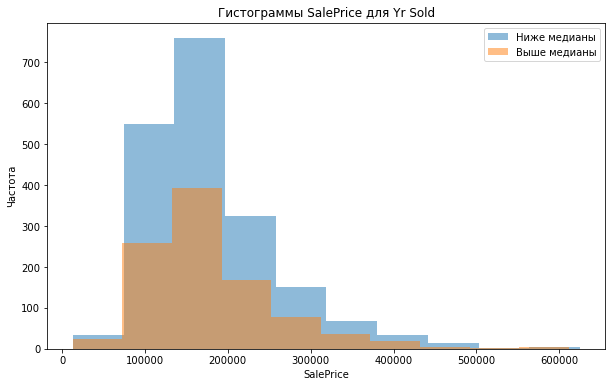

p-value для Yr Sold: 0.3377863148182856
Столбец Sale Type не является числовым и будет пропущен.
Столбец Sale Condition не является числовым и будет пропущен.


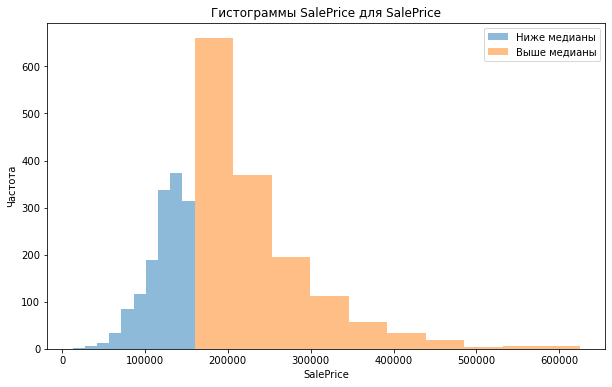

p-value для SalePrice: 0.0


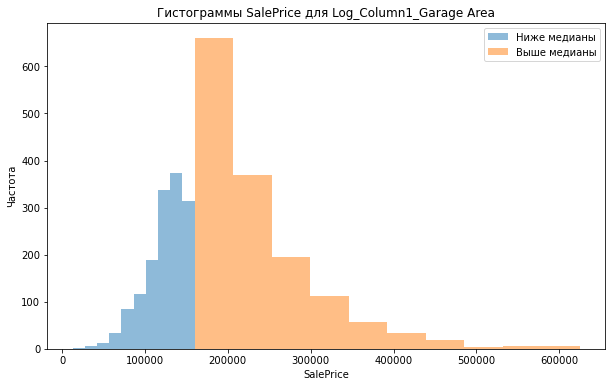

p-value для Log_Column1_Garage Area: 0.0


In [84]:
column_names = df_cleaned.columns

for col in column_names:
    if np.issubdtype(df_cleaned[col].dtype, np.number):
        median_value = np.median(df_cleaned[col].fillna(0))

        lower_half = df_cleaned[df_cleaned[col] <= median_value]
        upper_half = df_cleaned[df_cleaned[col] > median_value]

        plt.figure(figsize=(10, 6))
        plt.hist(lower_half['SalePrice'], alpha=0.5, label='Ниже медианы')
        plt.hist(upper_half['SalePrice'], alpha=0.5, label='Выше медианы')
        plt.title(f'Гистограммы SalePrice для {col}')
        plt.xlabel('SalePrice')
        plt.ylabel('Частота')
        plt.legend()
        plt.show()

        result = stats.mannwhitneyu(lower_half['SalePrice'], upper_half['SalePrice'])
        print(f'p-value для {col}: {result.pvalue}')

        if result.pvalue > 0.01:
            continue
    else:
        print(f'Столбец {col} не является числовым и будет пропущен.')